In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

In [2]:
img=cv2.imread('./test_images/images.jpg')
img.shape

(251, 201, 3)

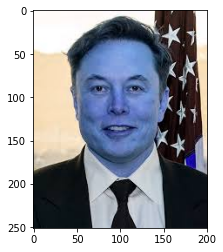

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(251, 201)

In [5]:
gray

array([[251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       ...,
       [ 17,  18,  20, ...,  16,  16,  16],
       [ 17,  18,  20, ...,  16,  16,  16],
       [ 17,  18,  20, ...,  16,  16,  16]], dtype=uint8)

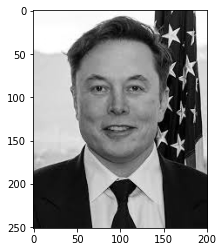

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 37,  43, 121, 121]])

In [8]:
x,y,w,h=faces[0]
x,y,w,h

(37, 43, 121, 121)

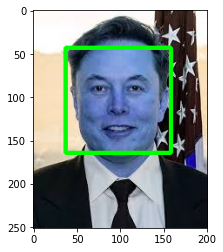

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
plt.imshow(face_img)

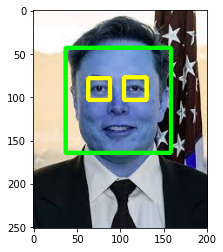

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),3)

plt.imshow(face_img)

In [11]:
# plt.imshow(roi_color)

In [12]:
# plt.imshow(roi_gray)

In [13]:
def get_cropped_img(img_path):
    img=cv2.imread(img_path)
    if(img is not None):
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces=face_cascade.detectMultiScale(gray,1.3,5)
        for (x,y,w,h) in faces:
            roi_gray=gray[y:y+h,x:x+w]
            roi_color=img[y:y+h,x:x+w]
            eyes=eye_cascade.detectMultiScale(roi_gray)
            if len(eyes)>=2:
                return roi_color

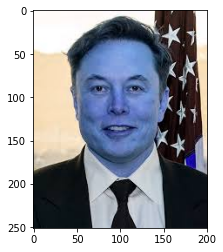

In [14]:
og_image=cv2.imread('./test_images/images.jpg')
plt.imshow(og_image)

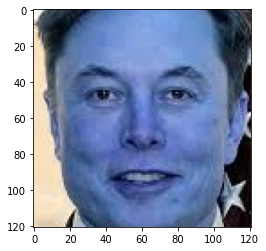

array([[[255, 255, 255],
        [252, 252, 252],
        [248, 250, 250],
        ...,
        [123, 119, 125],
        [ 62,  55,  60],
        [ 55,  48,  51]],

       [[252, 250, 249],
        [246, 247, 245],
        [241, 243, 243],
        ...,
        [ 81,  77,  83],
        [ 65,  58,  63],
        [ 63,  54,  57]],

       [[247, 248, 244],
        [244, 245, 243],
        [239, 242, 240],
        ...,
        [ 39,  35,  41],
        [ 63,  56,  61],
        [ 52,  42,  48]],

       ...,

       [[231, 219, 195],
        [228, 214, 191],
        [225, 212, 186],
        ...,
        [ 21,   8,  10],
        [ 19,   6,   8],
        [ 14,   1,   3]],

       [[233, 220, 194],
        [231, 216, 190],
        [228, 213, 187],
        ...,
        [ 21,   8,  10],
        [ 19,   6,   8],
        [ 14,   1,   3]],

       [[234, 219, 193],
        [230, 215, 189],
        [228, 213, 187],
        ...,
        [ 21,   8,  10],
        [ 19,   6,   8],
        [ 14,   1,   3]]

In [15]:
cropped_img=get_cropped_img('./test_images/images.jpg')
plt.imshow(cropped_img)
plt.show()
cropped_img

In [16]:
img2=cv2.imread('./test_images/_131598052_elon.jpg')
img2.shape

(549, 976, 3)

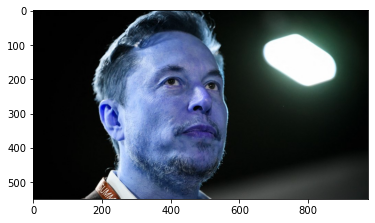

In [17]:
plt.imshow(img2)

In [18]:
cropped_img=get_cropped_img('./test_images/_131598052_elon.jpg')
cropped_img

In [19]:
path_to_data='./image dataset/'
path_to_cropped_data='./image dataset/cropped'

In [20]:
import os 
img_dir=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dir.append(entry.path)

In [21]:
img_dir

['./image dataset/elon_musk',
 './image dataset/pv_sindhu',
 './image dataset/ronaldo',
 './image dataset/virat_kohli',
 './image dataset/yash']

In [22]:
import shutil
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [23]:
cropped_img_dirc=[]
celebrity_files_name_dict={}

for img_dirct in img_dir:
    count=1
    celebrity_name=img_dirct.split('/')[-1]
    print(celebrity_name)
    celebrity_files_name_dict[celebrity_name]=[]
    for entry in os.scandir(img_dirct):
        roi_color=get_cropped_img(entry.path)
        if roi_color is not None:
            cropped_img_folder=path_to_cropped_data+"/"+celebrity_name
            if not os.path.exists(cropped_img_folder):
                os.makedirs(cropped_img_folder)
                cropped_img_dirc.append(cropped_img_folder)
                print("Generating cropped images in folder: ",cropped_img_folder)
                
            cropped_file_name=celebrity_name+str(count)+".png"
            cropped_file_path=cropped_img_folder+"/"+cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_files_name_dict[celebrity_name].append(cropped_file_path)
            count+=1

elon_musk
Generating cropped images in folder:  ./image dataset/cropped/elon_musk
pv_sindhu
Generating cropped images in folder:  ./image dataset/cropped/pv_sindhu
ronaldo
Generating cropped images in folder:  ./image dataset/cropped/ronaldo
virat_kohli
Generating cropped images in folder:  ./image dataset/cropped/virat_kohli
yash
Generating cropped images in folder:  ./image dataset/cropped/yash


## Feature Engineering using wavelet transform

In [24]:
#Code from stack overflow
import pywt
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

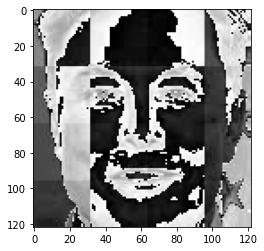

In [25]:
cropped_img=get_cropped_img('./test_images/images.jpg')
in_har=w2d(cropped_img,'db1',5)
plt.imshow(in_har,cmap='gray')

In [26]:
celebrity_files_name_dict

{'elon_musk': ['./image dataset/cropped/elon_musk/elon_musk1.png',
  './image dataset/cropped/elon_musk/elon_musk2.png',
  './image dataset/cropped/elon_musk/elon_musk3.png',
  './image dataset/cropped/elon_musk/elon_musk4.png',
  './image dataset/cropped/elon_musk/elon_musk5.png',
  './image dataset/cropped/elon_musk/elon_musk6.png',
  './image dataset/cropped/elon_musk/elon_musk7.png',
  './image dataset/cropped/elon_musk/elon_musk8.png',
  './image dataset/cropped/elon_musk/elon_musk9.png',
  './image dataset/cropped/elon_musk/elon_musk10.png',
  './image dataset/cropped/elon_musk/elon_musk11.png',
  './image dataset/cropped/elon_musk/elon_musk12.png',
  './image dataset/cropped/elon_musk/elon_musk13.png',
  './image dataset/cropped/elon_musk/elon_musk14.png',
  './image dataset/cropped/elon_musk/elon_musk15.png',
  './image dataset/cropped/elon_musk/elon_musk16.png',
  './image dataset/cropped/elon_musk/elon_musk17.png',
  './image dataset/cropped/elon_musk/elon_musk18.png',
  './i

In [27]:
class_dict={}
count=0
for celebrity_name in celebrity_files_name_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'elon_musk': 0, 'pv_sindhu': 1, 'ronaldo': 2, 'virat_kohli': 3, 'yash': 4}

In [28]:
X,Y=[],[]
for celebrity_name,training_files in celebrity_files_name_dict.items():
    for training_images in training_files:
        img=cv2.imread(training_images)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        Y.append(class_dict[celebrity_name])

In [29]:
len(X)

198

In [30]:
len(X[0])

4096

In [31]:
X[0]

array([[ 51],
       [ 60],
       [ 94],
       ...,
       [251],
       [253],
       [231]], dtype=uint8)

In [32]:
len(Y)

198

In [33]:
Y[0]

0

In [34]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(198, 4096)

## Training Model

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.85

In [37]:
len(x_train)

158

In [38]:
len(x_test)

40

In [39]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         9
           3       1.00      0.69      0.82        13
           4       0.64      1.00      0.78         7

    accuracy                           0.85        40
   macro avg       0.88      0.86      0.85        40
weighted avg       0.89      0.85      0.85        40



In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [60]:
model_params = {
    'svm': {
        'model': SVC(probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear','poly','sigmoid'],
            'svc__gamma': [1,0.1,0.01,0.001]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [61]:
scores=[]
best_estimators={}
import pandas as pd
for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
    
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.855040,"{'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': ..."
1,random_forest,0.627016,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.892540,{'logisticregression__C': 1}


In [62]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=1, gamma=1, kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [63]:
best_estimators['svm'].score(x_test,y_test)

0.85

In [64]:
best_estimators['random_forest'].score(x_test,y_test)

0.575

In [65]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.875

In [66]:
best_clf = best_estimators['svm']

In [67]:
best_clf.score(x_test,y_test)

0.85

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[6, 0, 0, 0, 1],
       [0, 3, 1, 0, 0],
       [0, 0, 9, 0, 0],
       [1, 1, 0, 9, 2],
       [0, 0, 0, 0, 7]], dtype=int64)

Text(69.0, 0.5, 'Truth')

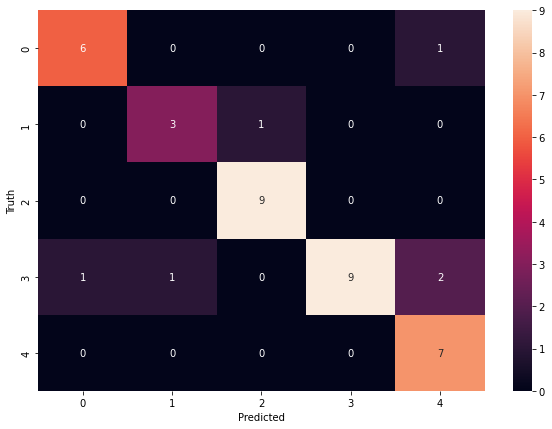

In [69]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
final_model=SVC(C=1, gamma=1, kernel='linear', probability=True)
final_model.fit(X,Y)

SVC(C=1, gamma=1, kernel='linear', probability=True)

In [72]:
# cm = confusion_matrix(y_test, final_model.predict(x_test))
# plt.figure(figsize = (10,7))
# sn.heatmap(cm, annot=True)
# plt.xlabel('Predicted')
# plt.ylabel('Truth')

In [73]:
import joblib

In [74]:
joblib.dump(final_model,'saved_model.pkl')

['saved_model.pkl']

In [75]:
import json
with open('class_dict.json','w') as f:
    f.write(json.dumps(class_dict))